In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust

from sklearn.model_selection import train_test_split,cross_validate, KFold, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
wine = pd.read_csv("dataset/winequality-red.csv")

In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.shape

(1599, 12)

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Observation:
No null values

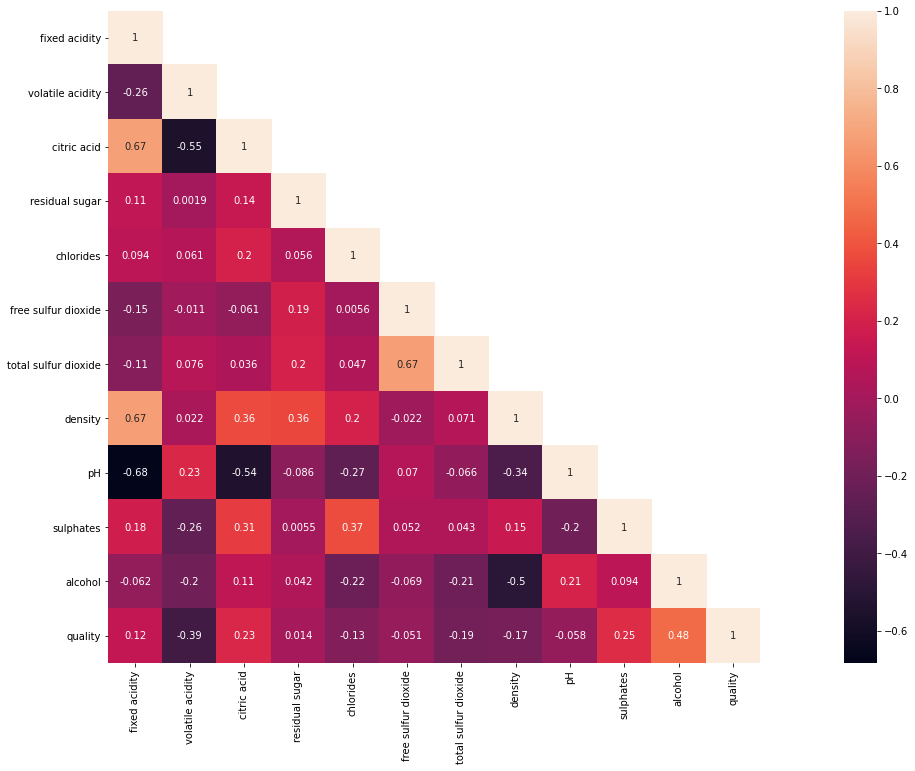

In [9]:
cor_mat = wine.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

### Observations:

1. The quality of wine is highly related to volatile acidity.

2. Also the quality of wine is highly corelated to alcohol.

3. pH and citric acid/ fixed acidity are highly inversely related as all of us know that acids have smaller pH values.

4. Self Relation ie of a fetaure to itself is 1 as expected.

5.  some other similar inferences can be drawn.

### Ploting with different features

In [10]:
def plot(feature_x, target = 'quality', dataframe = wine):
    sns.boxplot(x = target, y = feature_x, data = dataframe)
    plt.show()
    sns.violinplot(x = target, y = feature_x, data = dataframe, size = 8)
    plt.show()

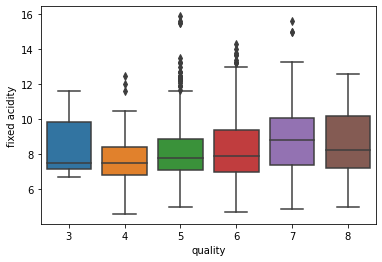

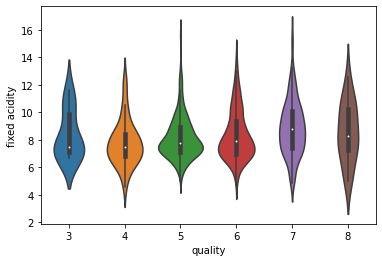

In [11]:
plot('fixed acidity')

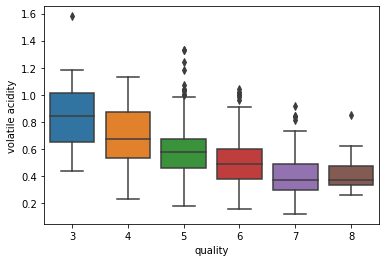

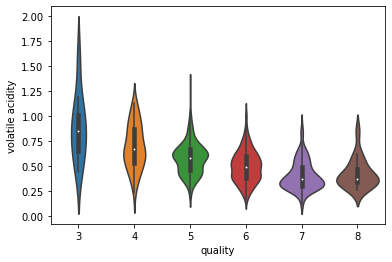

In [12]:
plot('volatile acidity')

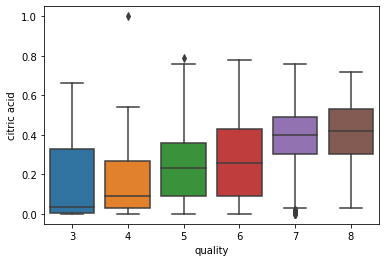

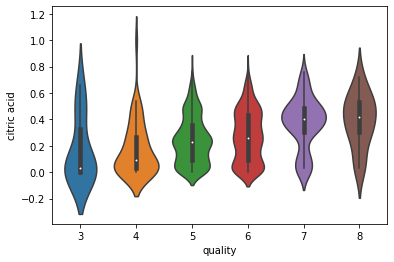

In [13]:
plot('citric acid')

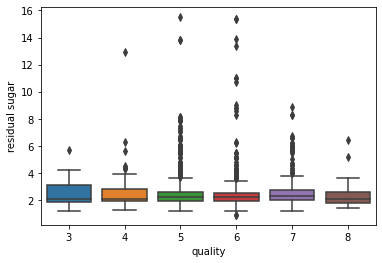

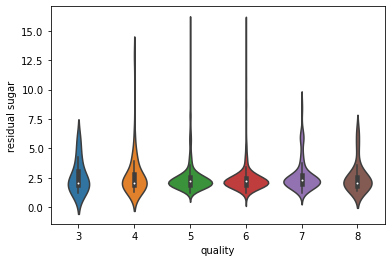

In [14]:
plot('residual sugar')

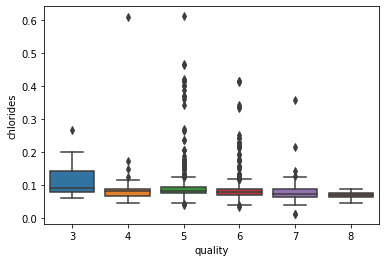

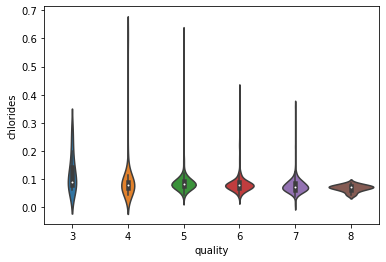

In [15]:
plot('chlorides')

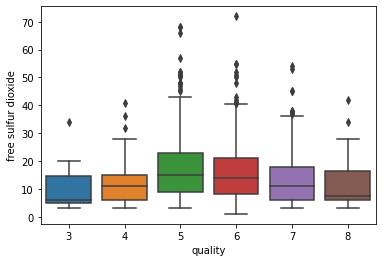

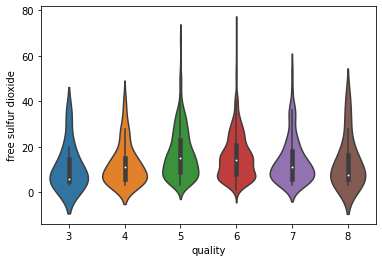

In [16]:
plot('free sulfur dioxide')

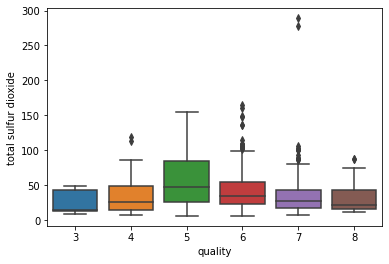

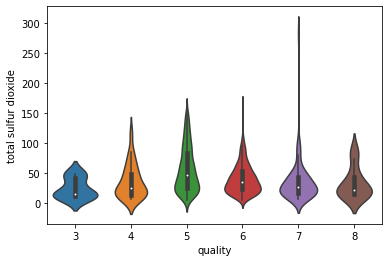

In [17]:
plot('total sulfur dioxide')

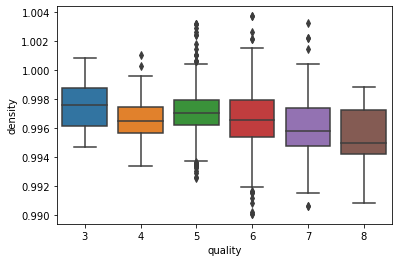

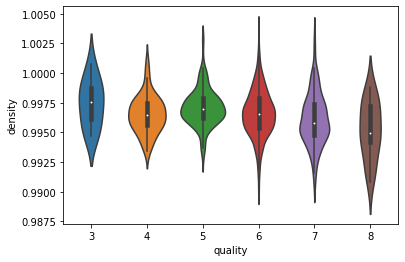

In [18]:
plot('density')

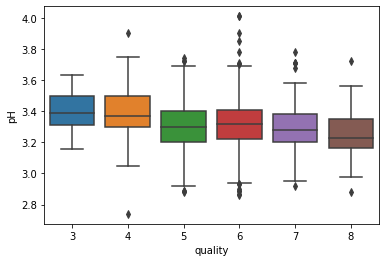

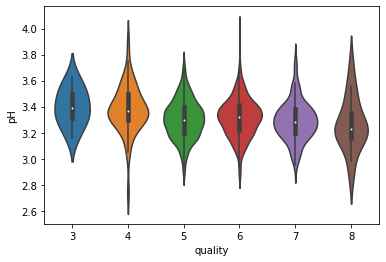

In [19]:
plot('pH')

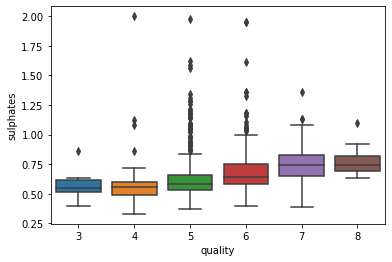

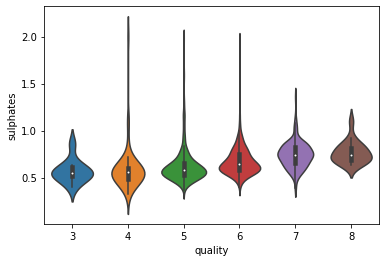

In [20]:
plot('sulphates')

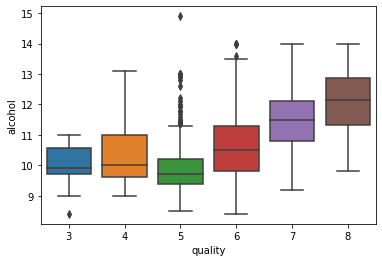

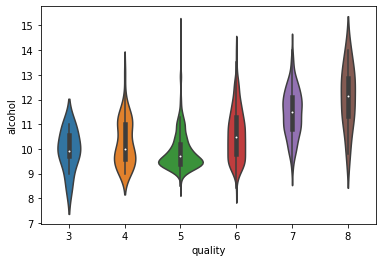

In [21]:
plot('alcohol')

## Pre-Processing

### Converting continuous variable into catogorical variable

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [23]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [24]:
label_quality = LabelEncoder()

wine['quality'] = label_quality.fit_transform(wine['quality'])

In [25]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Scalling and splitting the dataset

#### 1. MinMaxScaler()

In [26]:
scaler_min_max = MinMaxScaler()
scaled_min_max_wine = scaler_min_max.fit_transform(wine)

X = scaled_min_max_wine[:,0:11]
Y = wine['quality']#.as_matrix()

x_train_min_max, x_test_min_max, y_train_min_max, y_test_min_max = train_test_split(X, Y, test_size = 0.25, random_state = 42)

#### 2. StandardScaler()

In [27]:
scaler_standard = StandardScaler()
scaled_standard_wine = scaler_standard.fit_transform(wine)

X = scaled_standard_wine[:,0:11]
Y = wine['quality']#.as_matrix()

x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(X, Y, test_size = 0.25, random_state = 42)

## K-NN Model

#### 1. MinMaxScaler()

In [28]:
from sklearn.neighbors import KNeighborsClassifier

select_params_knn = {"n_neighbors": range(1, 51),
                 "weights": ["uniform", "distance"],
                 "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}

knn_grid_min_max = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = select_params_knn, scoring='accuracy', cv = 10)

knn_grid_min_max.fit(x_train_min_max, y_train_min_max)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
knn_grid_min_max.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [30]:
knn_grid_min_max.best_score_

0.9049299719887957

#### Accurecy Score on test data

In [40]:
pred_knn_min_max = knn_grid_min_max.predict(x_test_min_max)
accuracy_score(pred_knn_min_max, y_test_min_max)

0.92

#### Confusion Matrix

[[334  13]
 [ 19  34]]


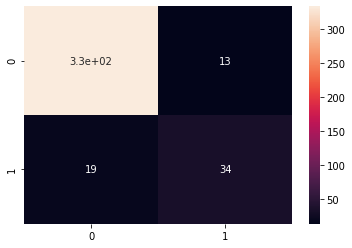

In [42]:
confusion_matrix_knn_min_max = confusion_matrix(y_test_min_max, pred_knn_min_max)
print(confusion_matrix_knn_min_max)
sns.heatmap(confusion_matrix_knn_min_max, annot = True)

#### F1-Score

In [45]:
f1_score(y_test_min_max, pred_knn_min_max, average = 'weighted')

0.9179428571428572

#### 2. StandardScaler()

In [31]:
knn_grid_standard = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = select_params_knn, scoring = 'accuracy', cv = 10)

knn_grid_standard.fit(x_train_standard, y_train_standard)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [32]:
knn_grid_standard.best_params_

{'metric': 'chebyshev', 'n_neighbors': 43, 'weights': 'distance'}

In [33]:
knn_grid_standard.best_score_

0.9091246498599439

#### Accurecy Score on test data

In [49]:
pred_knn_standard = knn_grid_standard.predict(x_test_standard)
accuracy_score(pred_knn_standard, y_test_standard)

0.895

#### Confusion matrix in test data

[[338   9]
 [ 33  20]]


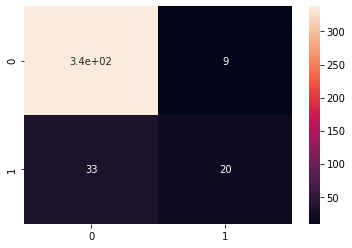

In [52]:
confusion_matrix_knn_standard = confusion_matrix(y_test_standard, pred_knn_standard)
print(confusion_matrix_knn_standard)
sns.heatmap(confusion_matrix_knn_standard, annot=True)

#### F1-score test data

In [54]:
f1_score(y_test_standard, pred_knn_standard, average = 'weighted')

0.8813890209932741

## Support Vector Machine (SVM)

### 1. MinMaxScaler()

In [34]:
from sklearn.svm import SVC

select_params_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

svm_grid_min_max = GridSearchCV(estimator = SVC(), param_grid = select_params_svm, scoring = 'accuracy', cv = 10)
svm_grid_min_max.fit(x_train_min_max, y_train_min_max)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [35]:
svm_grid_min_max.best_params_

{'C': 10, 'gamma': 100, 'kernel': 'rbf'}

In [36]:
svm_grid_min_max.best_score_

0.9032773109243697

#### Accuracy Score on test data

In [37]:
pred_svm_min_max = svm_grid_min_max.predict(x_test_min_max)
accuracy_score(pred_svm_min_max, y_test_min_max)

0.92

#### Confusion Matrix on test data

[[345   2]
 [ 30  23]]


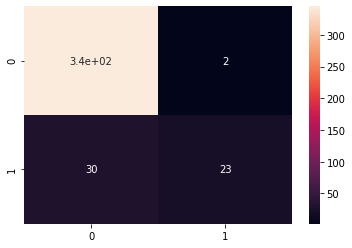

In [38]:
confusion_matrix_svm_min_max = confusion_matrix(y_test_min_max, pred_svm_min_max)
print(confusion_matrix_svm_min_max)
sns.heatmap(confusion_matrix_svm_min_max, annot = True)

#### F1- Score on test data

In [39]:
f1_score(y_test_min_max, pred_svm_min_max, average = 'weighted')

0.9071922721784219

### 2. StandardScaler()

In [45]:
svm_grid_standard = GridSearchCV(estimator = SVC(), param_grid = select_params_svm, scoring = 'accuracy', cv = 10)
svm_grid_standard.fit(x_train_standard, y_train_standard)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [46]:
svm_grid_standard.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [47]:
svm_grid_standard.best_score_

0.9016106442577032

#### Accuracy score on test data

In [50]:
pred_svm_standard = svm_grid_standard.predict(x_test_standard)
accuracy_score(pred_svm_standard, y_test_standard)

0.92

#### Confusion Matrix on test data

[[339   8]
 [ 24  29]]


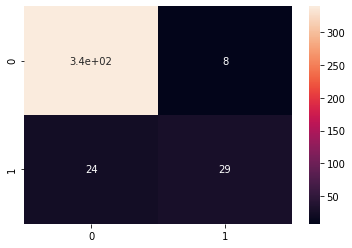

In [60]:
confusion_matrix_svm_standard = confusion_matrix(y_test_standard, pred_svm_standard)
print(confusion_matrix_svm_standard)
sns.heatmap(confusion_matrix_svm_standard, annot=True)

#### F1-Score on test data

In [58]:
f1_score(y_test_standard, pred_svm_standard, average = 'weighted')

0.9137902973395932